11490434/11490434 [==============================] - 1s 0us/step


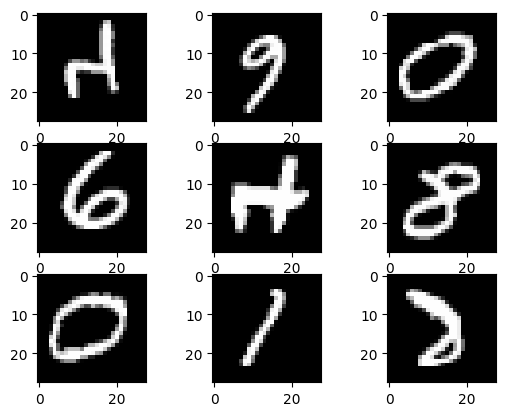

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
datagen.fit(X_train)
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9):
  for i in range(0,9):
    pyplot.subplot(330+1+i)
    pyplot.imshow(X_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
  pyplot.show()
  break

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32
BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

In [4]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()
print('X_train shape: ',X_train.shape)

170498071/170498071 [==============================] - 7s 0us/step
X_train shape:  (50000, 32, 32, 3)


In [7]:
# 종속변수 범주화 
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)
# 이미지 정규화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /= 255

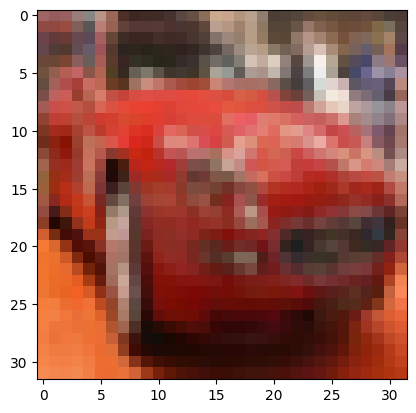

In [8]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()

In [9]:
model=Sequential()
# 입력사이즈 32 x 32 x 3
# 가중치 : 3x3 x 32 + 32
# 픽셀수 - 필터수 + 1
# 출력차수 : 32 x 32 x 32
model.add(Conv2D(32,(3,3),padding='same', # same: 입력사이즈 == 출력사이즈
                 input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 16 x 16 x 32
model.add(Dropout(0.25)) # 계산만 25 % 안 함 -> 과적합 방지
model.add(Flatten()) # 8192
model.add(Dense(512)) # 가중치 8192
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM, metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=BATCH_SIZE,
                  epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 16s 14ms/step - loss: 2.3266 - accuracy: 0.1090 - val_loss: 2.3015 - val_accuracy: 0.1114
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 2.3013 - accuracy: 0.1137 - val_loss: 2.3020 - val_accuracy: 0.1112
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 2.2997 - accuracy: 0.1155 - val_loss: 2.3022 - val_accuracy: 0.1103
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 2.2949 - accuracy: 0.1208 - val_loss: 2.3065 - val_accuracy: 0.1037
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 2.2873 - accuracy: 0.1290 - val_loss: 2.3093 - val_accuracy: 0.1106
Epoch 6/20
313/313 [==============================] - 4s 11ms/step - loss: 2.2745 - accuracy: 0.1423 - val_loss: 2.3123 - val_accuracy: 0.1046
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 2.2569 - accuracy: 0.1574 - val_loss: 2.3234 - val_accuracy: 0.1021
Ep

In [12]:
score=model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print('\nTest loss:',score[0])
print('Test accuracy:',score[1])

79/79 [==============================] - 0s 4ms/step - loss: 2.7317 - accuracy: 0.1012

Test loss: 2.7317235469818115
Test accuracy: 0.10119999945163727


In [13]:
#웹에서 사용
model_json=model.to_json()
open('cifar10_architecture.json','w').write(model_json) # 모델 구조
model.save_weights('cifar10_weights.h5',overwrite=True) # 가중치

In [14]:
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
from keras.optimizers import SGD
model_architecture='cifar10_architecture.json'
model_weights='cifar10_weights.h5'
model=model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

In [38]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/daejeon_1/DataSet/dogs_vs_cats-20230601T053814Z-001.zip') as zip:
  zip.extractall()
  print('done')

done


In [39]:
with ZipFile('/content/dogs_vs_cats/test.zip') as zip:
  zip.extractall()
  print('done')

done


In [40]:
with ZipFile('/content/dogs_vs_cats/train.zip') as zip:
  zip.extractall()
  print('done')

done


In [42]:
import tensorflow_datasets as tfds
ds,info=tfds.load('cifar10',split='train',with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteMIZ7KR/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteMIZ7KR/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


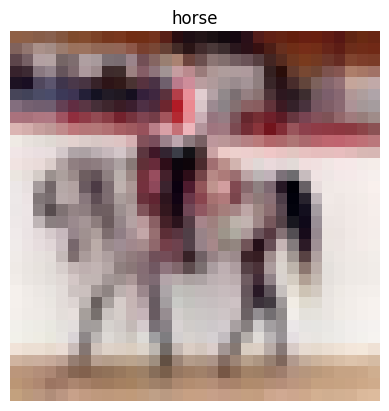

In [44]:
for example in ds.take(1):
    image = example['image']
    label = example['label']

# 이미지와 라벨 출력
fig, ax = plt.subplots()
ax.imshow(image)
ax.set_title(info.features['label'].int2str(label.numpy()))
plt.axis('off')

# 이미지 저장
plt.savefig('cifar10_image.png')

In [36]:
import os
os.getcwd()

'/content'

In [33]:
%cp /content/drive/MyDrive/daejeon_1/DataSet/cat.0.jpg /content

cp: missing destination file operand after '/content/drive/MyDrive/daejeon_1/DataSet/cat.0.jpg'
Try 'cp --help' for more information.


In [26]:
%cp /content/drive/MyDrive/daejeon_1/DataSet/dog.0.jpg /content

In [48]:
img_names=['cat.0.jpg','dog.0.jpg']

In [49]:
# 문제 
# 이미지를 2장 로딩한 다음 예측해보시오

import numpy as np
from imageio import imread
from skimage.transform import resize

imgs=[resize(imread(img_name),(32,32)).astype('float32') for img_name in img_names]
imgs=np.array(imgs)/255

<ipython-input-49-993eee5c775e>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs=[resize(imread(img_name),(32,32)).astype('float32') for img_name in img_names]


In [32]:
cifa10_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predictions=model.predict(imgs)
print(predictions)
for pred in predictions:
  print(cifa10_name[np.argmax(pred)])

1/1 [==============================] - 0s 18ms/step
[[0.03618719 0.40415585 0.06818628 0.08729842 0.0920129  0.13279763
  0.03012252 0.06856713 0.07823663 0.00243542]
 [0.03598923 0.40762633 0.06720593 0.08732332 0.09031441 0.13112253
  0.03072749 0.06924137 0.07816139 0.00228804]]
automobile
automobile


In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3,decode_predictions
inceptionv3=InceptionV3(input_shape=(299,299,3))

96112376/96112376 [==============================] - 3s 0us/step


35363/35363 [==============================] - 0s 0us/step
테스트 시 소요시간 : 3.106445550918579
clog (100.00%)


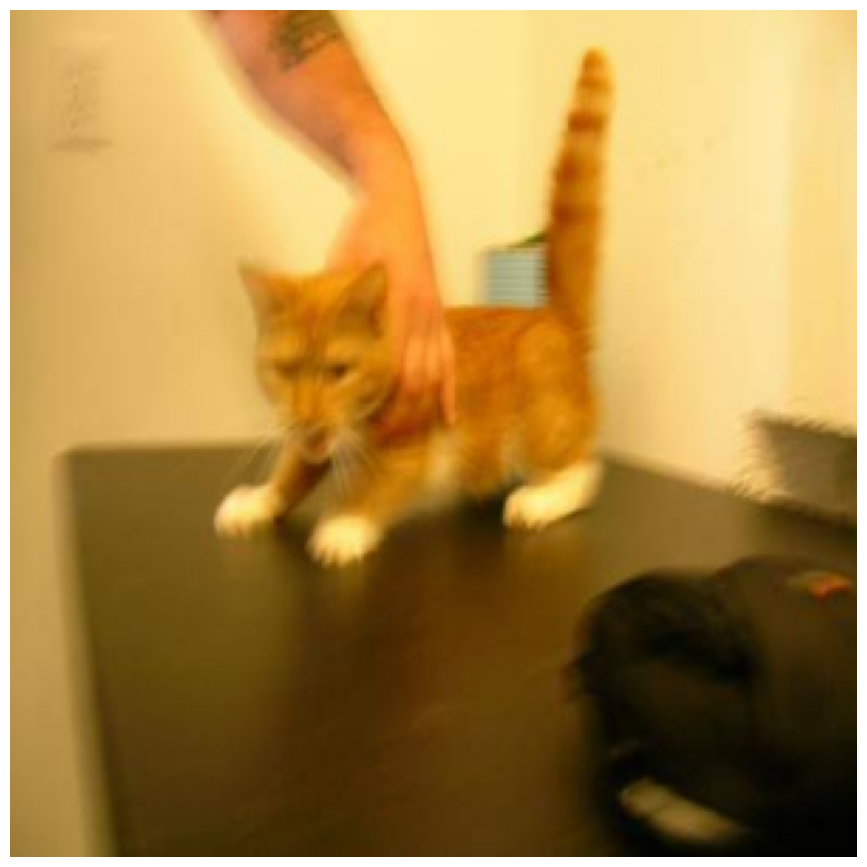

In [51]:
import cv2
import time
img=cv2.imread('/content/cat.0.jpg',-1)
img=cv2.resize(img,(299,299))
start=time.time()
yhat=inceptionv3.predict(img.reshape(-1,299,299,3))
time=time.time()-start
label=decode_predictions(yhat)
label=label[0][0]

print('테스트 시 소요시간 : {}'.format(time))
print('%s (%.2f%%)' % (label[1],label[2]*100))
img=img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis('off')
plt.show()


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
train_ds,validation_ds,test_ds=tfds.load(
    'cats_vs_dogs',
    split=['train[:40%]','train[40%:50%]','train[50%:60%]'],
    as_supervised=True,
)
print('학습훈련세트: %d' % tf.data.experimental.cardinality(train_ds))
print('검증훈련세트: %d' % tf.data.experimental.cardinality(validation_ds))
print('테스트훈련세트: %d' % tf.data.experimental.cardinality(test_ds))

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
학습훈련세트: 9305
검증훈련세트: 2326
테스트훈련세트: 2326


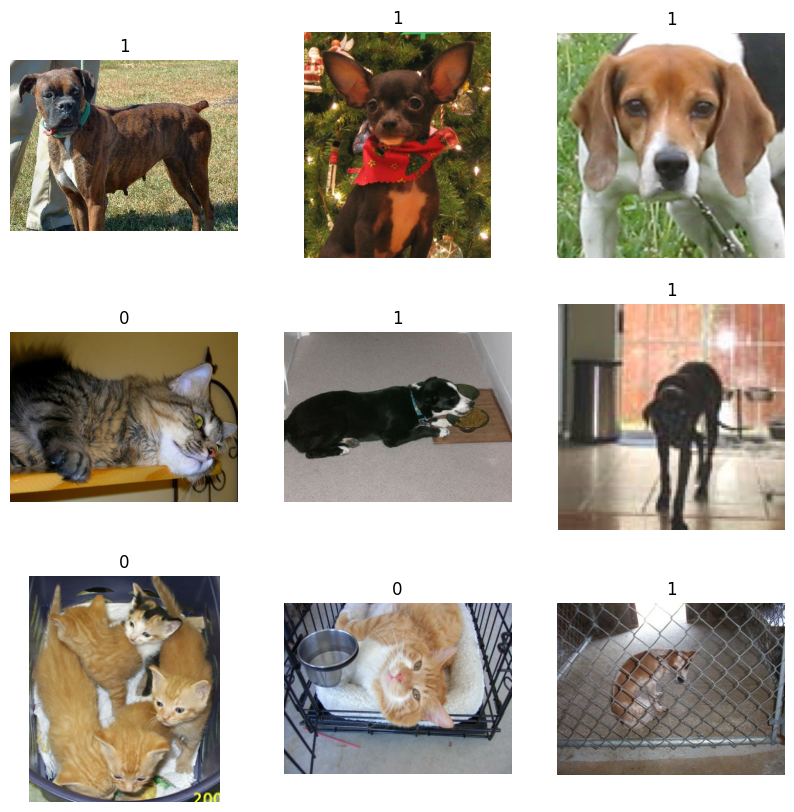

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_ds.take(9)):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(image)
  plt.title(int(label))
  plt.axis('off')

In [4]:
size=(150,150)
train_ds=train_ds.map(lambda x,y:(tf.image.resize(x,size),y))
validation_ds=validation_ds.map(lambda x,y:(tf.image.resize(x,size),y))
test_ds=test_ds.map(lambda x,y:(tf.image.resize(x,size),y))

In [5]:
batch_size=32
train_ds=train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds=validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds=test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [6]:
# 데이터 증강
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [layers.RandomFlip('horizontal'), layers.RandomRotation(0.1)]
)

In [7]:
base_model=keras.applications.Xception(
    weights='imagenet',
    input_shape=(150,150,3),
    include_top=False # 1000개로 출력레이어 불포함 softmax를 사용하던 곳
)
base_model.trainable=False # 모든레이어는 학습 불가능 
inputs=keras.Input(shape=(150,150,3))
x=data_augmentation(inputs) # 데이터 증강
# 스케일링 255로 나눈거: 양수만 
# 127.5로 나눈거: -1~1사이의 정규화
scale_layer=keras.layers.Rescaling(scale=1/127.5,offset=-1)
x=scale_layer(x)
x=base_model(x,training=False)
x=keras.layers.GlobalAveragePooling2D()(x) # 풀링: 사이즈를 줄여줌 (32,124,124,3)
# 32 x 3
x=keras.layers.Dropout(0.2)(x)
outputs=keras.layers.Dense(1)(x)
model=keras.Model(inputs,outputs)
model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0      

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)
epochs=20
history= model.fit(train_ds,epochs=epochs,validation_data=validation_ds)

Epoch 1/20
291/291 [==============================] - 46s 94ms/step - loss: 0.1677 - binary_accuracy: 0.9268 - val_loss: 0.0801 - val_binary_accuracy: 0.9673
Epoch 2/20
291/291 [==============================] - 23s 80ms/step - loss: 0.1176 - binary_accuracy: 0.9536 - val_loss: 0.0758 - val_binary_accuracy: 0.9725
Epoch 3/20
291/291 [==============================] - 23s 78ms/step - loss: 0.1077 - binary_accuracy: 0.9563 - val_loss: 0.0754 - val_binary_accuracy: 0.9712
Epoch 4/20
291/291 [==============================] - 24s 82ms/step - loss: 0.1012 - binary_accuracy: 0.9568 - val_loss: 0.0714 - val_binary_accuracy: 0.9733
Epoch 5/20
291/291 [==============================] - 22s 76ms/step - loss: 0.1019 - binary_accuracy: 0.9568 - val_loss: 0.0736 - val_binary_accuracy: 0.9716
Epoch 6/20
291/291 [==============================] - 22s 76ms/step - loss: 0.0988 - binary_accuracy: 0.9598 - val_loss: 0.0747 - val_binary_accuracy: 0.9721
Epoch 7/20
291/291 [==============================] 

# 점심 이후 지점

In [9]:
# 문제 테스트 데이터 입력해서 예측한다음 loss와 accuracy출력해보시오
results = model.evaluate(test_ds)
print('Test Accuracy:', results[1])
print('Test Loss:', results[0])

73/73 [==============================] - 5s 67ms/step - loss: 0.0726 - binary_accuracy: 0.9725
Test Accuracy: 0.9724849462509155
Test Loss: 0.0725620836019516


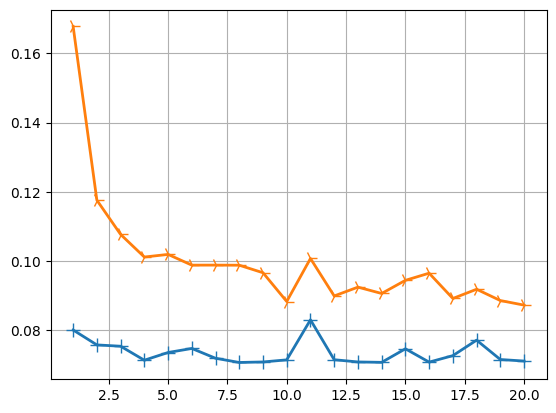

In [10]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0, marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.grid(True)
plt.show()

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image

In [6]:
batch_size=48
width=150
height=150
epochs=20
NUM_TRAIN=2000
NUM_TEST=1000
dropout_rate=0.2
input_shape=(height,width,3)

In [7]:
import os
if not os.path.isdir('efficientnet_keras_transfer_learning'):
  !git clone http://github.com/Tony607/efficientnet_keras_transfer_learning
  %cd efficientnet_keras_transfer_learning/

Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 5.44 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/efficientnet_keras_transfer_learning


In [8]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0 as Net
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.applications.efficientnet import preprocess_input
conv_base=Net(weights='imagenet',include_top=False,input_shape=input_shape)

16705208/16705208 [==============================] - 0s 0us/step


In [9]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/daejeon_1/DataSet/catsanddogs.zip','r') as zip:
  zip.extractall()
  print('done')

done


In [10]:
!pwd

/content/efficientnet_keras_transfer_learning


In [11]:
%cd /content

/content


In [12]:
original_dataset_dir='PetImages'
cat_images=glob.glob(os.path.join(original_dataset_dir,'Cat','*.jpg'))
dog_images=glob.glob(os.path.join(original_dataset_dir,'Dog','*.jpg'))
print('total cat Images: {}\n\rtotal dog images: {}'.format(len(cat_images),len(dog_images)))

total cat Images: 0
total dog images: 0


In [13]:
base_dir='./data/dog_vs_cat_small'
os.makedirs(base_dir,exist_ok=True)
train_dir=os.path.join(base_dir,'train')
os.makedirs(train_dir,exist_ok=True)
validation_dir=os.path.join(base_dir,'validation')
os.makedirs(validation_dir,exist_ok=True)
test_dir=os.path.join(base_dir,'test')
os.makedirs(test_dir,exist_ok=True)
train_cats_dir=os.path.join(train_dir,'cats')
os.makedirs(train_cats_dir,exist_ok=True)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.makedirs(train_dogs_dir,exist_ok=True)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

In [14]:
fnames = cat_images[:NUM_TRAIN//2]
for fname in fnames:
    dst = os.path.join(train_cats_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

offset = NUM_TRAIN//2
fnames = cat_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
    dst = os.path.join(validation_cats_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
offset = offset + NUM_TEST // 2
fnames = cat_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
    dst = os.path.join(test_cats_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = dog_images[:NUM_TRAIN//2]
for fname in fnames:
    dst = os.path.join(train_dogs_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

offset = NUM_TRAIN//2
fnames = dog_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
    dst = os.path.join(validation_dogs_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
offset = offset + NUM_TEST // 2

fnames = dog_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
    dst = os.path.join(test_dogs_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2, # 전단
      zoom_range=0.2, # 일부확대해서
      horizontal_flip=True,
      fill_mode='nearest') # 빈경우가 발생하면 가장 가까운걸로

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(height, width), # 로딩하면서 resize
        batch_size=batch_size,
        class_mode='categorical') # 종속변수는 범주화

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [16]:
from tensorflow.keras import models
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
if dropout_rate > 0:
    model.add(layers.Dropout(dropout_rate, name="dropout_out"))
model.add(layers.Dense(2, activation='softmax', name="fc_out"))

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
      use_multiprocessing=True,
      workers=4)

<ipython-input-17-95ae5648fc7b>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


ValueError: ignored